<img src="https://devra.ai/analyst/notebook/1253/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
    <div style="font-size:150%; color:#FEE100"><b>AI-Powered Music Sentiment and Recommendation Analysis</b></div>
    <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

It is fascinating to see how music preferences and user sentiments can be linked in creative ways. The dataset we investigate offers a glimpse into the world of user-generated texts and their associated music recommendations. The idea that the rhythm of a song (its BPM or mood) might correlate with a user's sentiment is as intriguing as the juxtaposition of drumbeats and prose. If you find these insights useful, please consider upvoting the notebook.

## Table of Contents

1. [Data Loading](#Data-Loading)
2. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Predictive Modeling](#Predictive-Modeling)
5. [Conclusion](#Conclusion)

In [1]:
# Importing libraries and setting up the plotting configuration
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # For environments that require non-interactive backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure proper backend switching when only plt is imported

import seaborn as sns

# For inline plotting on Kaggle
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid', context='notebook')

## Data Loading

In [2]:
# Load the dataset
data_path = '/kaggle/input/ai-powered-music-recommendation-system/music_sentiment_dataset.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataframe
df.head()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


## Data Cleaning and Preprocessing

In [3]:
# Check for missing values and basic data info
print(df.info())
print(df.isnull().sum())

# In case there are missing values, especially in critical columns, we will handle them appropriately
# For this example, we'll drop rows with missing target 'Sentiment_Label' or any essential features
essential_columns = ['Sentiment_Label', 'Tempo (BPM)', 'Genre', 'Mood', 'Energy', 'Danceability']
df.dropna(subset=essential_columns, inplace=True)

# Convert 'Tempo (BPM)' to numeric (if not already) and force errors to NaN for further cleaning
df['Tempo (BPM)'] = pd.to_numeric(df['Tempo (BPM)'], errors='coerce')

# After conversion, drop rows with NaN in 'Tempo (BPM)'
df.dropna(subset=['Tempo (BPM)'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display summary statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   User_Text            1000 non-null   object
 2   Sentiment_Label      1000 non-null   object
 3   Recommended_Song_ID  1000 non-null   object
 4   Song_Name            1000 non-null   object
 5   Artist               1000 non-null   object
 6   Genre                1000 non-null   object
 7   Tempo (BPM)          1000 non-null   int64 
 8   Mood                 1000 non-null   object
 9   Energy               1000 non-null   object
 10  Danceability         1000 non-null   object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB
None
User_ID                0
User_Text              0
Sentiment_Label        0
Recommended_Song_ID    0
Song_Name              0
Artist                 0
Genre                  0
Tempo (BPM)            0


,Tempo (BPM)
count,1000.00000
mean,97.76000
std,36.74701
min,50.00000
25%,67.00000
50%,109.00000
75%,130.00000
max,160.00000


## Exploratory Data Analysis

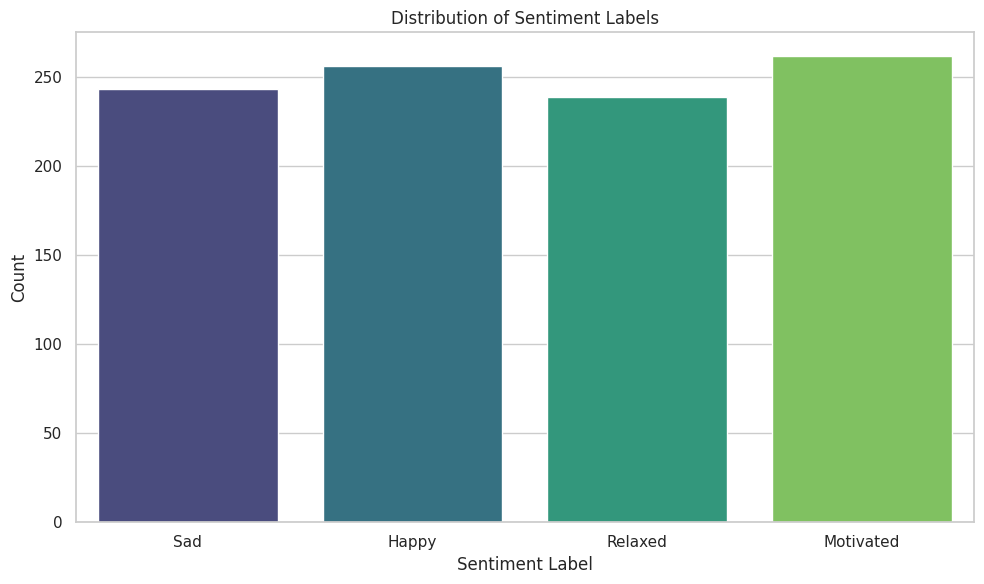

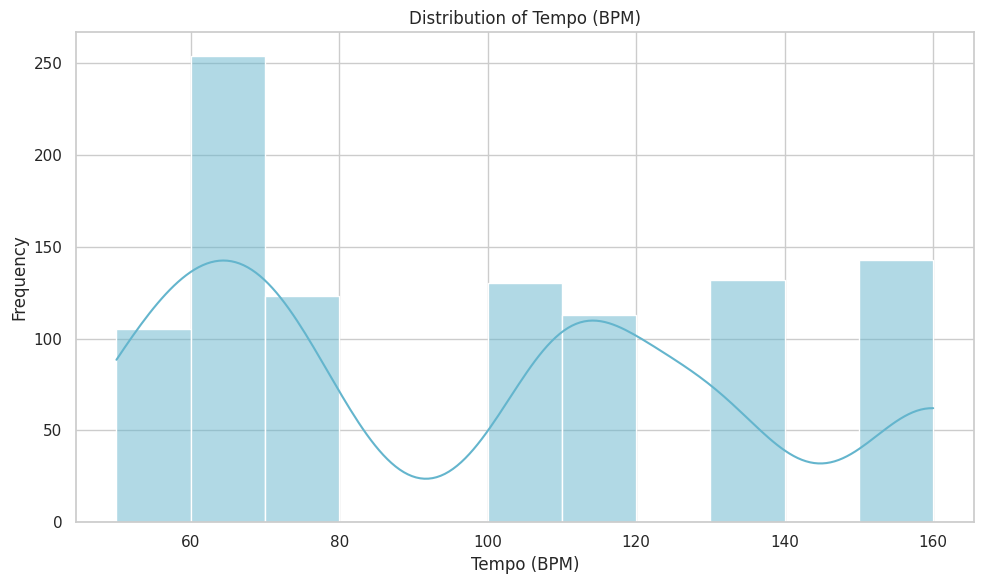

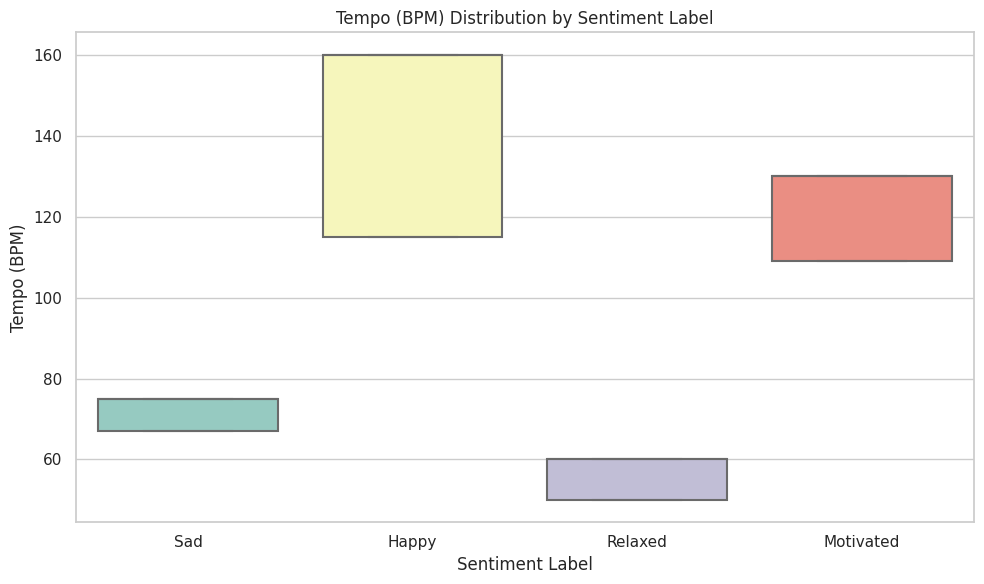

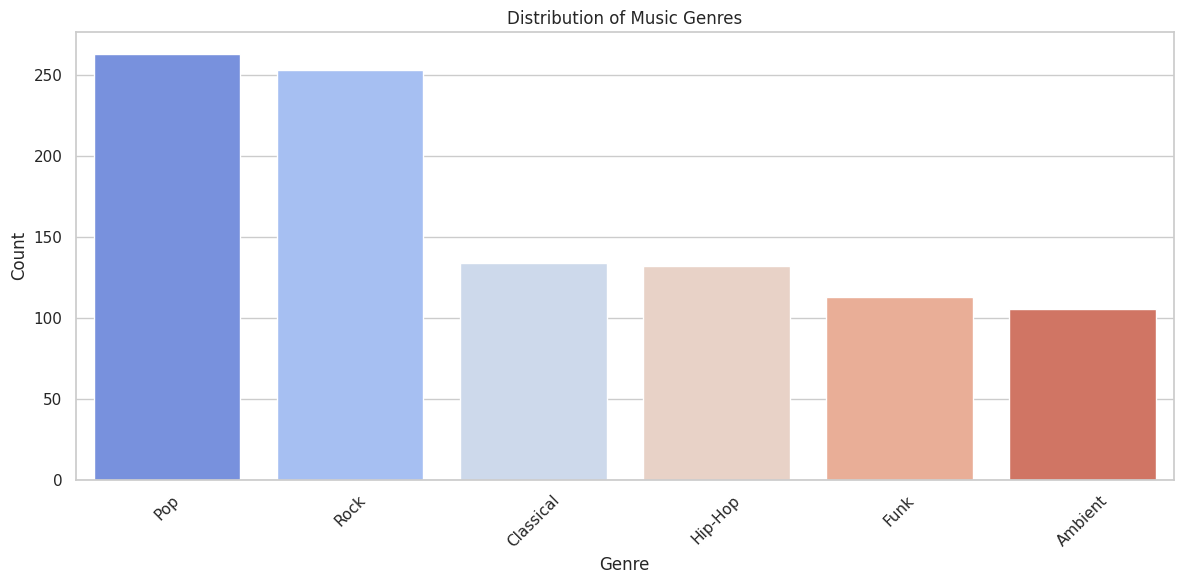

In [4]:
## Count Plot for Sentiment Labels
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sentiment_Label', palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Histogram for Tempo (BPM)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Tempo (BPM)', kde=True, color='c')
plt.title('Distribution of Tempo (BPM)')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Box Plot of Tempo (BPM) grouped by Sentiment Label
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Sentiment_Label', y='Tempo (BPM)', palette='Set3')
plt.title('Tempo (BPM) Distribution by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Tempo (BPM)')
plt.tight_layout()
plt.show()

## Count Plot for Genre
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', palette='coolwarm', order=df['Genre'].value_counts().index)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Predictive Modeling

Accuracy of the RandomForest model: 1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



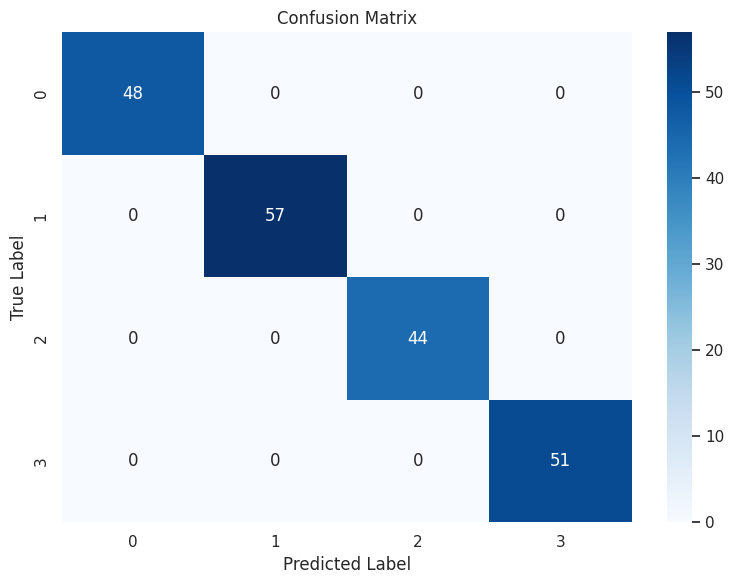

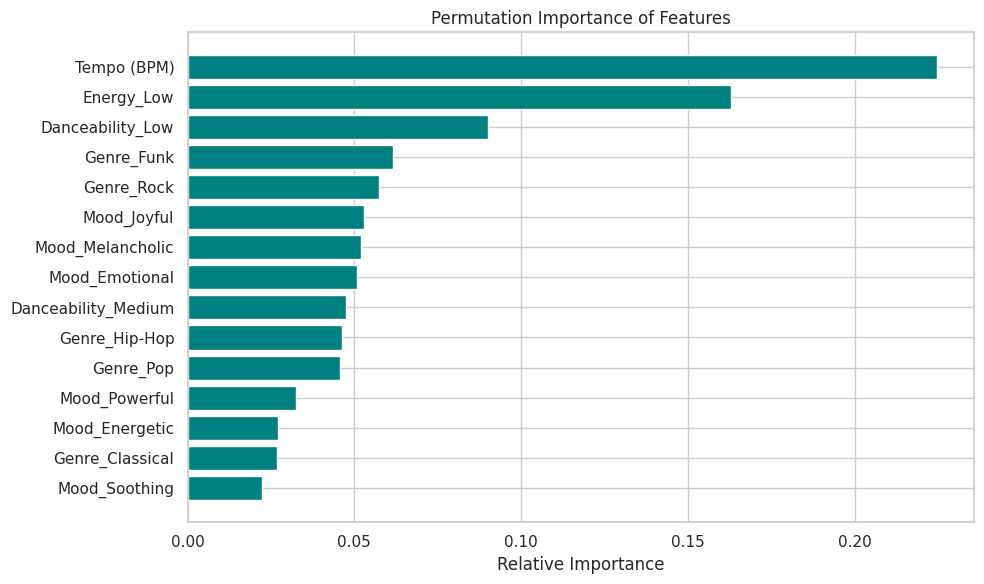

In [5]:
# For predictive modeling, we aim to predict the 'Sentiment_Label'.
# We will use a simple RandomForestClassifier, after encoding categorical features.

# Selecting relevant features for prediction.
# Exclude columns that are unlikely to be useful predictors such as IDs and textual descriptions
features = ['Tempo (BPM)', 'Genre', 'Mood', 'Energy', 'Danceability']
target = 'Sentiment_Label'

# Make a copy of the dataframe for modeling
model_df = df[features + [target]].copy()

# Encode categorical variables. For simplicity, we use LabelEncoder for target, and pd.get_dummies for features
# Encoding target variable
le = LabelEncoder()
model_df[target] = le.fit_transform(model_df[target])

# One-hot encode categorical features: Genre, Mood, Energy, Danceability
categorical_features = ['Genre', 'Mood', 'Energy', 'Danceability']
model_df = pd.get_dummies(model_df, columns=categorical_features, drop_first=True)

# Split the data into training and testing sets
X = model_df.drop(target, axis=1)
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the RandomForest model: {accuracy:.4f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Permutation Importance visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()

## Conclusion

This notebook explored a multifaceted approach to understanding a music recommendation and sentiment dataset. Beginning with data cleaning and preliminary visualization analyses, we observed distributions across important features such as Sentiment Label, Tempo, and Genre. A RandomForest classifier was created to predict User Sentiment based on selected musical attributes. Although the analysis is relatively straightforward, further feature engineering could involve deeper text analysis of the 'User_Text' field and more nuanced handling of categorical features.

Merits of this approach include its combination of EDA and predictive modeling while using several visualization techniques to validate assumptions. There is room for future enhancements such as cross-validation, tuning model hyperparameters, or even deploying more complex models (like combining TF-IDF features for text with audio features) for improved insights.

Thank you for reading. If you found this notebook useful, please consider upvoting it.